In [65]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [66]:
data.shape

(129880, 24)

In [67]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


### The first 2 cols is not useful, let's Drop these

In [68]:
data.drop(data.iloc[:, 0:1], inplace = True, axis = 1)

In [69]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [70]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

### Let's Convert the category cols to category data type

In [71]:
category = [0, 2, 3, 4] + list(range(8, 23))
data.iloc[:, category] = data.iloc[:, category].astype('category')


In [72]:
data['Gender'] = data['Gender'].astype('category')
data['Customer Type'] = data['Customer Type'].astype('category')
data['Type of Travel'] = data['Type of Travel'].astype('category')
data['Class'] = data['Class'].astype('category')
data['Satisfaction'] = data['Satisfaction'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  category
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  category
 3   Type of Travel                          129880 non-null  category
 4   Class                                   129880 non-null  category
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival Delay                           129487 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

In [73]:
data.describe(include="all")

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880,129880.000000,129880,129880,129880,129880.000000,129880.000000,129487.000000,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880
unique,2,NaN,2,2,3,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,2
top,Female,NaN,Returning,Business,Business,NaN,NaN,NaN,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,Neutral or Dissatisfied
freq,65899,NaN,106100,89693,62160,NaN,NaN,NaN,31880.0,30393.0,36333.0,38468.0,35717.0,38703.0,39756.0,35886.0,33969.0,30563.0,47323.0,32320.0,36791.0,46761.0,73452
mean,NaN,39.427957,NaN,NaN,NaN,1190.316392,14.713713,15.091129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.119360,NaN,NaN,NaN,997.452477,38.071126,38.465650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7.000000,NaN,NaN,NaN,31.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,40.000000,NaN,NaN,NaN,844.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
data['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

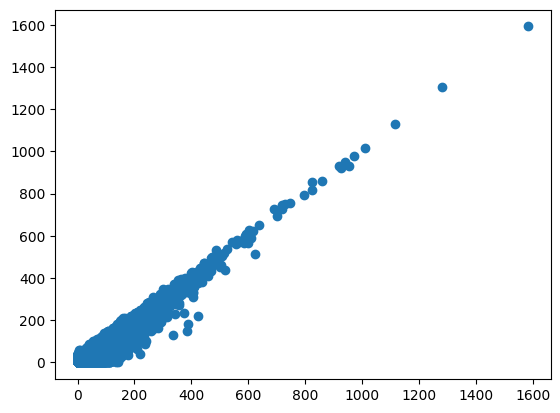

In [100]:
plt.scatter(data['Arrival Delay'], data['Departure Delay'])

the dependence of the arrival time delay on the departure time delay is linear.

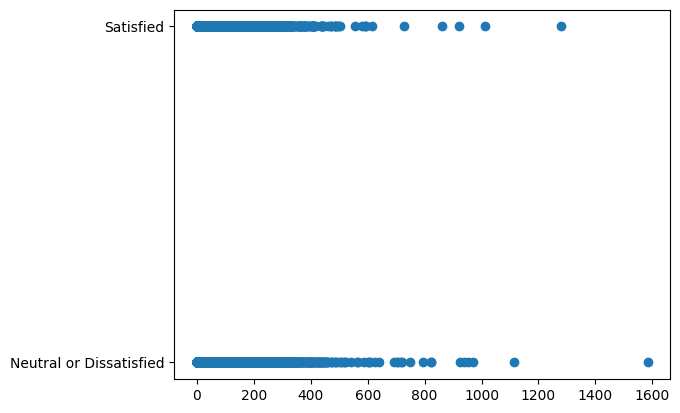

In [106]:
# the relation between arrival delay and satisfaction
plt.scatter(data['Arrival Delay'], data['Satisfaction'])
plt.show()

* There is no relation between arrival delay and satisfaction

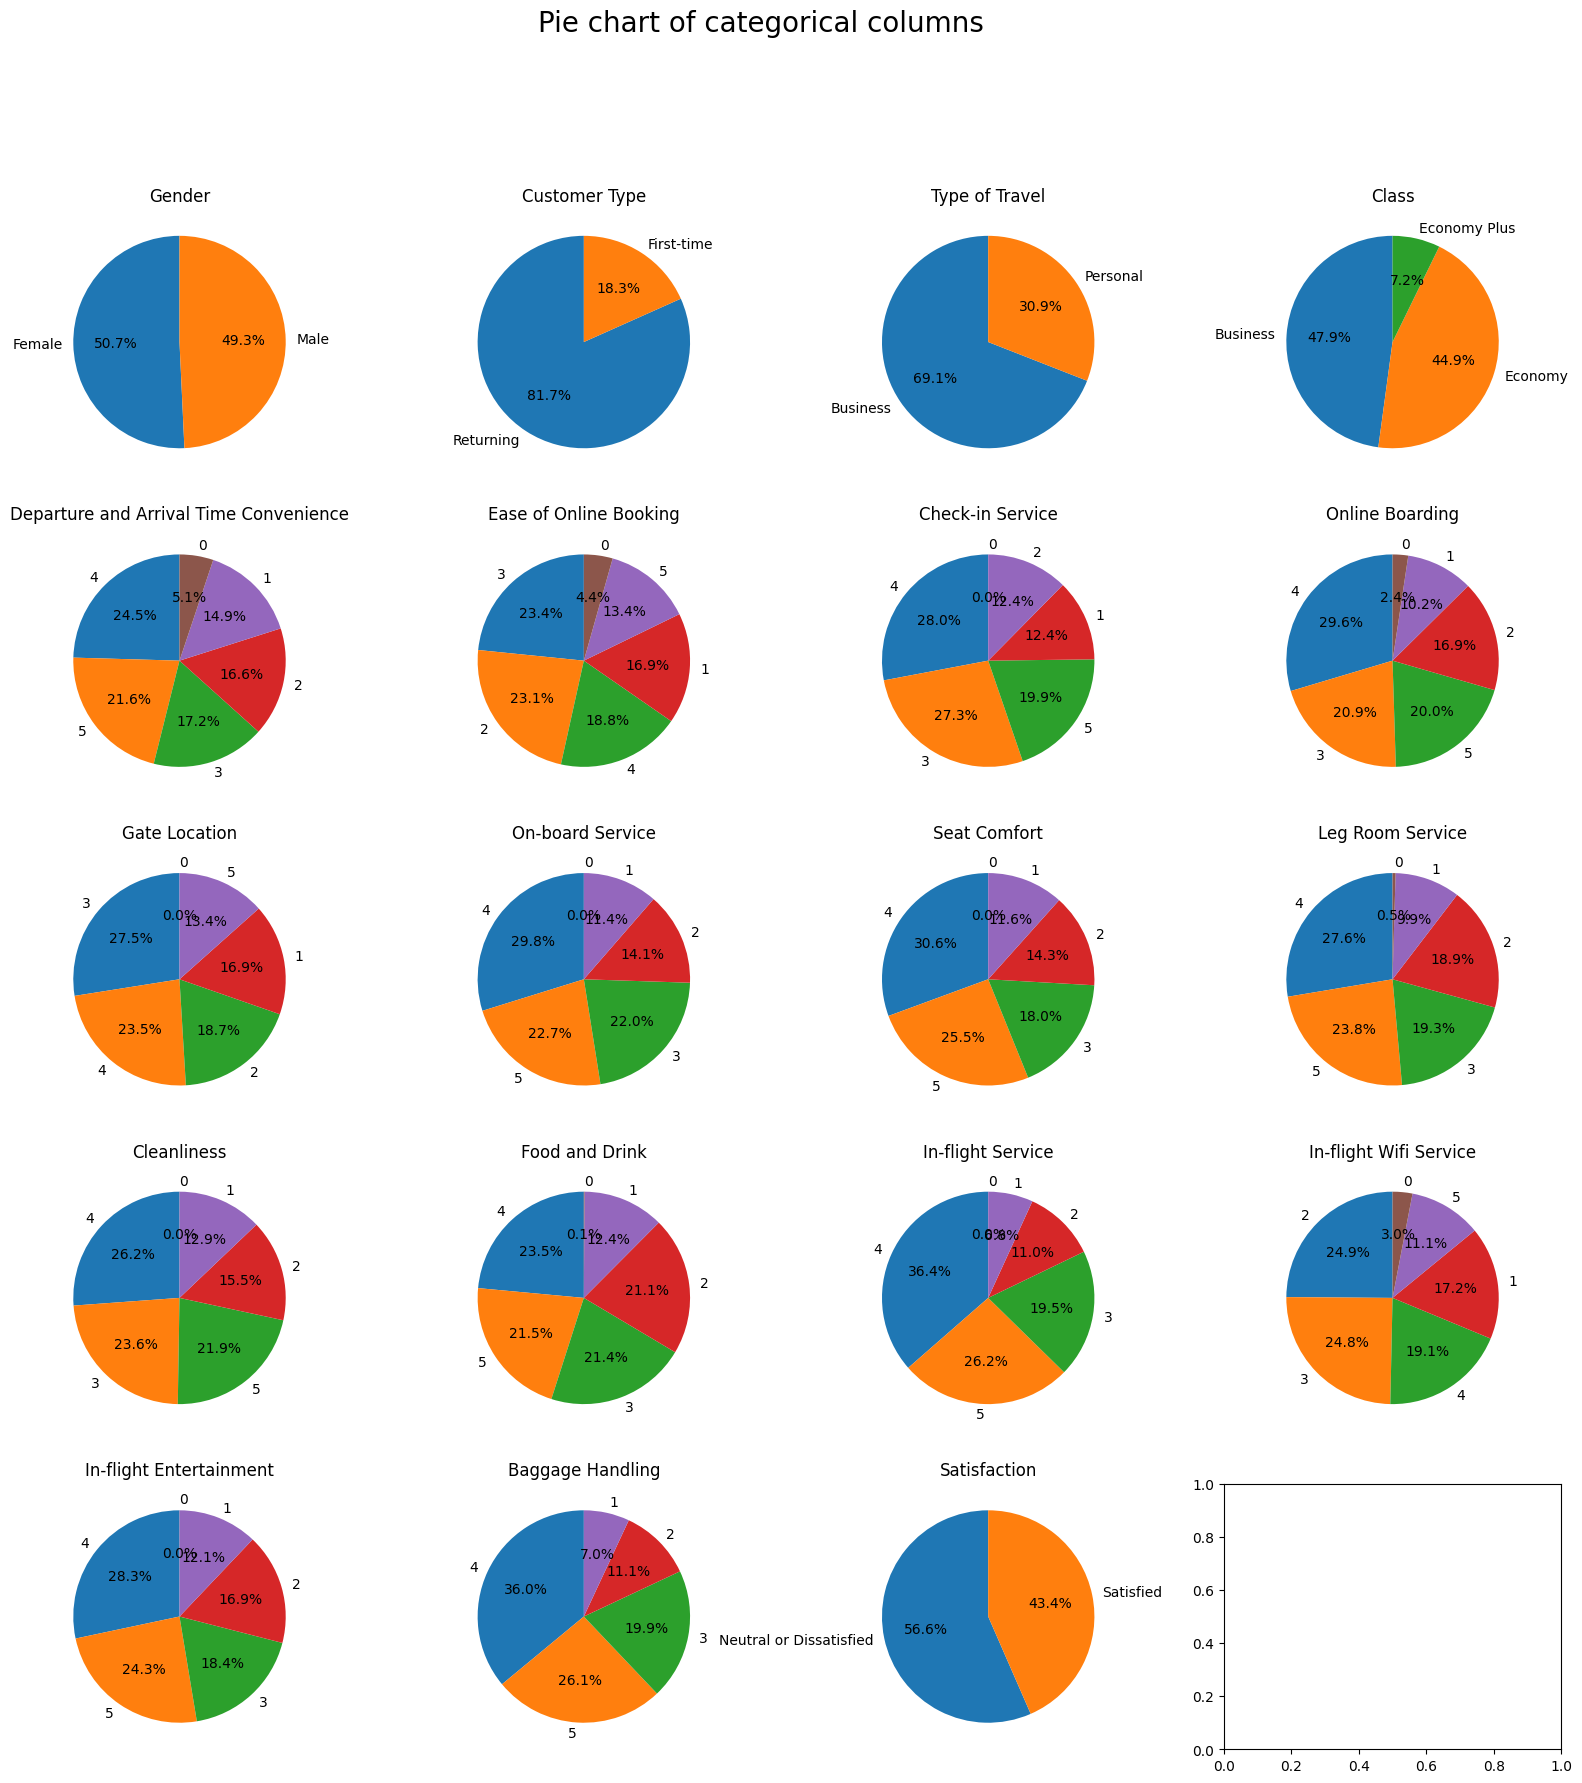

In [75]:
# Get all indexes of categorical variables
categorical = data.select_dtypes(include=['category']).columns
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
fig.suptitle('Pie chart of categorical columns', fontsize=20)
# plot pie chart of all categorical cols
for i, col in enumerate(categorical):
    values = data[col].value_counts()
    labels = values.index
    sizes = values.values
    ax = axes[i//4, i%4]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

plt.show()


### Some conclusions after above plots:
* the number of male and female is almost the same
* Most of customers is Returning Customer
* Most of customers is on Business travel
* The ease of Online booking is not very satisfied
* More than 50% of customers is satisfied with the seat comfort
* More than 50% of customers is satisfied with the leg room service
* More than 50% of customers is satisfied with the inflight service
* More than 50% of customers is satisfied with the inflight entertainment

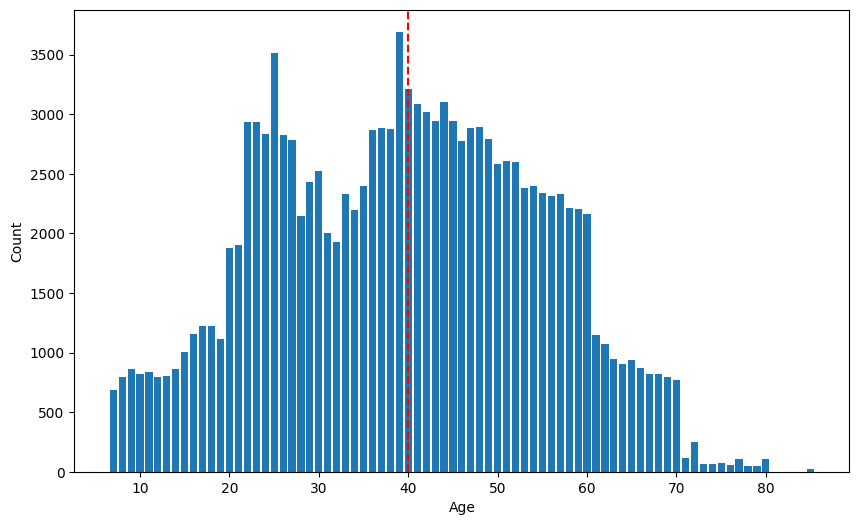

In [76]:
# plot age and count
median = data['Age'].median()   
plt.figure(figsize=(10, 6)) 
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts().values)
plt.axvline(median, color='r', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

 Most of the passengers are between 20 and 60 years old. The median age is 39 years old.

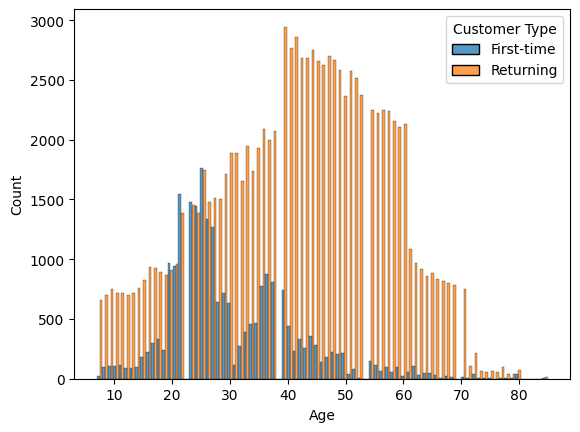

In [98]:
# the relationship between age and Customer Type
sns.histplot(data, x="Age", hue="Customer Type", multiple="dodge")
plt.show()

Most of passengers who travel for the first time In their twenties

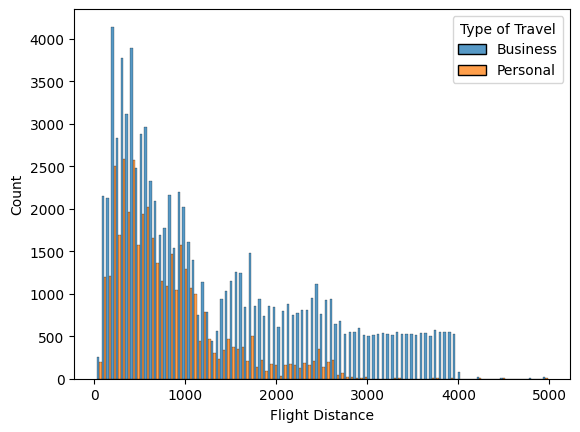

In [99]:
# the relation between flight distance and type of travel
sns.histplot(data, x="Flight Distance", hue="Type of Travel", multiple="dodge")
plt.show()

* Most of customers who travel for long distances take business trips

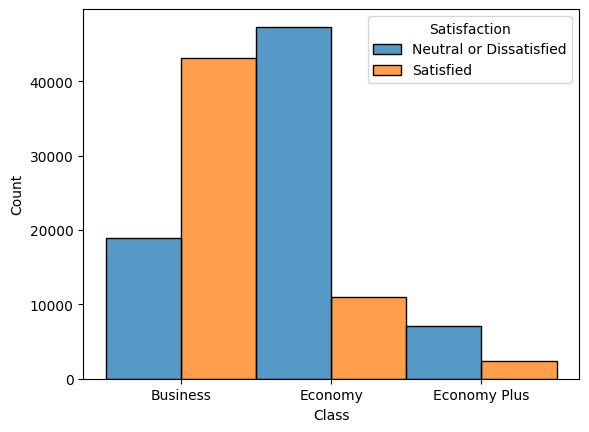

In [107]:
# The realtion between class and satisfaction
sns.histplot(data, x="Class", hue="Satisfaction", multiple="dodge")
plt.show()

* Most of customers who take business class are satisfied. In contrast, most of customers who take eco class or eco plus are not satisfied.

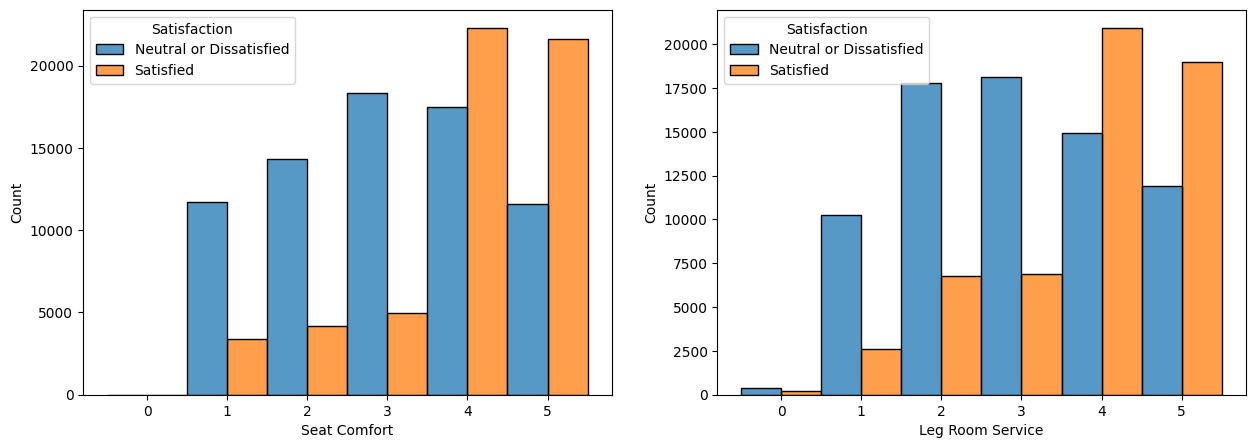

In [118]:
# The realtion between Seat comfort and satisfaction
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data, x="Seat Comfort", hue="Satisfaction", multiple="dodge", ax=ax[0])
sns.histplot(data, x='Leg Room Service', hue="Satisfaction", multiple="dodge", ax=ax[1])
plt.show()

* Most of the passengers who rated the seat comfort as 4 or 5 are satisfied

<Axes: xlabel='In-flight Wifi Service', ylabel='Count'>

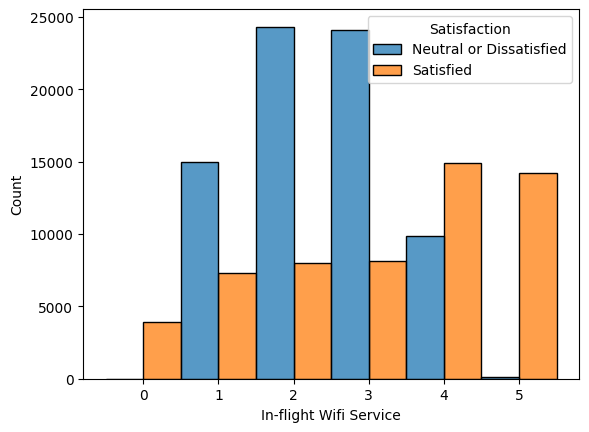

In [119]:
sns.histplot(data, x="In-flight Wifi Service", hue="Satisfaction", multiple="dodge")

* *ALL* of the passengers who rated the Wifi Service as 5 are satisfied

In [120]:
data.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

## Handling Missing Values

In [121]:
data['Arrival Delay'].fillna(data['Arrival Delay'].mean(), inplace=True)
data.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    